In [164]:
import numpy as np
import pandas as pd
import os

np.random.seed(10)

In [5]:
dirty_folder = "dirty"
files = [file for file in os.listdir(dirty_folder) if file.endswith(".parquet")]
files

['users.parquet',
 'abandoned_carts.parquet',
 'inventory.parquet',
 'regulars.parquet',
 'orders.parquet']

In [186]:
df = pd.read_parquet(f"{dirty_folder}/users.parquet")
drop_indexes = df[((df["count_adults"]==0) & (df["count_people"]>0)) |
   ((df["count_adults"]==0) & (df["count_pets"]>0))].index

df.drop(index=drop_indexes, inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4977 entries, 2160 to 3360
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   user_id                4977 non-null   object 
 1   user_segment           4977 non-null   object 
 2   user_nuts1             4926 non-null   object 
 3   first_ordered_at       4977 non-null   object 
 4   customer_cohort_month  4977 non-null   object 
 5   count_people           322 non-null    float64
 6   count_adults           322 non-null    float64
 7   count_children         322 non-null    float64
 8   count_babies           322 non-null    float64
 9   count_pets             322 non-null    float64
dtypes: float64(5), object(5)
memory usage: 427.7+ KB


In [218]:
regions = df["user_nuts1"].unique()
user_segments = df["user_segment"].unique()
fillna_columns = [column for column in df.columns if column.startswith("count")]

for region in regions:
    for segment in user_segments:
        df_aux = df[(df["user_nuts1"]==region) & (df["user_segment"]==segment)]
        for column in fillna_columns:
            missing = df_aux[column].isna()
            s = df_aux[column].value_counts(normalize=True)
            np.random.seed(10)
            df.loc[missing, column] = np.random.choice(s.index, size=len(df_aux[missing]),p=s.values)
            
    # print(df[(df["user_nuts1"]==region)]["user_segment"].value_counts(normalize=True))
    # print("Null values")
    # print(df[(df["user_nuts1"]==region) & (df["count_adults"].notna())]["user_segment"].value_counts(normalize=True))

TypeError: unhashable type: 'Series'

In [222]:
missing = df[df_aux[column].isna()]

missing

/tmp/ipykernel_98849/69595252.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  missing = df[df_aux[column].isna()]


IndexingError: Unalignable boolean Series provided as indexer (index of the boolean Series and of the indexed object do not match).

In [188]:



s

count_people
2.0    0.266667
4.0    0.266667
3.0    0.200000
5.0    0.133333
1.0    0.133333
Name: proportion, dtype: float64

In [216]:



df_aux["count_people"].value_counts(normalize=True)

count_people
4.0    0.269430
2.0    0.264249
3.0    0.227979
5.0    0.145078
1.0    0.093264
Name: proportion, dtype: float64

count_people
2.0    0.279793
4.0    0.248705
3.0    0.202073
5.0    0.176166
1.0    0.093264
Name: proportion, dtype: float64

In [171]:
df_aux["count_people"].value_counts(normalize=True)

count_people
3.0    0.533333
4.0    0.333333
1.0    0.066667
2.0    0.066667
Name: proportion, dtype: float64

In [146]:
df[(df["user_nuts1"]==region)]["user_segment"].value_counts(normalize=True)

user_segment
Top Up         0.5
Proposition    0.5
Name: proportion, dtype: float64

user_segment
Top Up         0.5
Proposition    0.5
Name: proportion, dtype: float64

In [135]:
people = df.count_people

people.isna().sum()

4655

<Axes: >

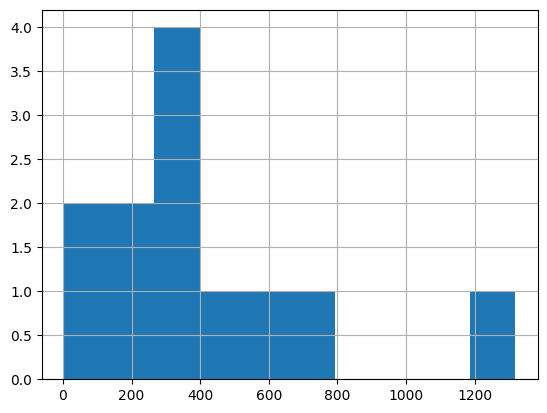

In [129]:
df["user_nuts1"].value_counts(normalize=True).hist()

<Axes: >

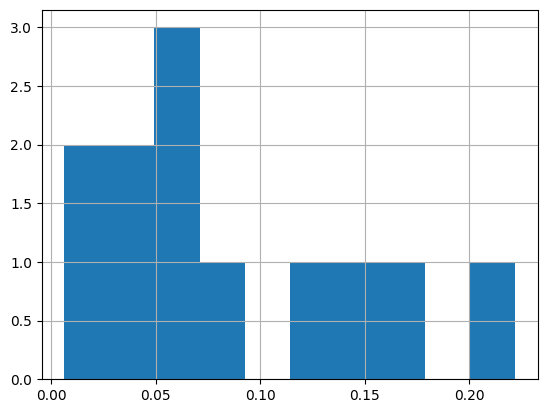

In [133]:
df[df["count_people"].notna()]["user_nuts1"].value_counts(normalize=True).hist()

array([[<Axes: title={'center': 'count_people'}>,
        <Axes: title={'center': 'count_adults'}>],
       [<Axes: title={'center': 'count_children'}>,
        <Axes: title={'center': 'count_babies'}>],
       [<Axes: title={'center': 'count_pets'}>, <Axes: >]], dtype=object)

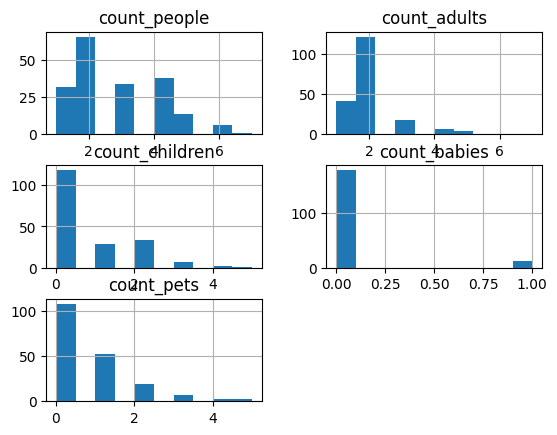

In [111]:
df[df["user_segment"]=="Proposition"].hist()

In [96]:
df[((df["count_adults"]==0) & (df["count_people"]>0)) |
   ((df["count_adults"]==0) & (df["count_pets"]>0))]

,user_id,user_segment,user_nuts1,first_ordered_at,customer_cohort_month,count_people,count_adults,count_children,count_babies,count_pets


In [ ]:
df = pd.read_parquet(f"{dirty_folder}/users.parquet")

In [45]:
df.head()

,variant_id,price,compare_at_price,vendor,product_type,tags
0,39587297165444,3.09,3.15,heinz,condiments-dressings,"[table-sauces, vegan]"
1,34370361229444,4.99,5.50,whogivesacrap,toilet-roll-kitchen-roll-tissue,"[b-corp, eco, toilet-rolls]"
2,34284951863428,3.69,3.99,plenty,toilet-roll-kitchen-roll-tissue,[kitchen-roll]
3,33667283583108,1.79,1.99,thecheekypanda,toilet-roll-kitchen-roll-tissue,"[b-corp, cruelty-free, eco, tissue, vegan]"
4,33803537973380,1.99,2.09,colgate,dental,[dental-accessories]


In [69]:

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 4983 entries, 2160 to 3360
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   user_id                4983 non-null   object 
 1   user_segment           4983 non-null   object 
 2   user_nuts1             4932 non-null   object 
 3   first_ordered_at       4983 non-null   object 
 4   customer_cohort_month  4983 non-null   object 
 5   count_people           325 non-null    float64
 6   count_adults           325 non-null    float64
 7   count_children         325 non-null    float64
 8   count_babies           325 non-null    float64
 9   count_pets             325 non-null    float64
dtypes: float64(5), object(5)
memory usage: 428.2+ KB


,user_id,user_segment,user_nuts1,first_ordered_at,customer_cohort_month,count_people,count_adults,count_children,count_babies,count_pets
2160,0e823a42e107461379e5b5613b7aa00537a72e1b0eaa7a...,Top Up,UKH,2021-05-08 13:33:49,2021-05-01 00:00:00,NaN,NaN,NaN,NaN,NaN
1123,15768ced9bed648f745a7aa566a8895f7a73b9a47c1d4f...,Top Up,UKJ,2021-11-17 16:30:20,2021-11-01 00:00:00,NaN,NaN,NaN,NaN,NaN
1958,33e0cb6eacea0775e34adbaa2c1dec16b9d6484e6b9324...,Top Up,UKD,2022-03-09 23:12:25,2022-03-01 00:00:00,NaN,NaN,NaN,NaN,NaN
675,57ca7591dc79825df0cecc4836a58e6062454555c86c35...,Top Up,UKI,2021-04-23 16:29:02,2021-04-01 00:00:00,NaN,NaN,NaN,NaN,NaN
4694,085d8e598139ce6fc9f75d9de97960fa9e1457b409ec00...,Top Up,UKJ,2021-11-02 13:50:06,2021-11-01 00:00:00,NaN,NaN,NaN,NaN,NaN


In [70]:
#df[(df["count_people"]==1) & (df["count_adults"]==1)]["user_id"].iloc[0]
df["user_id"].iloc[0]

'0e823a42e107461379e5b5613b7aa00537a72e1b0eaa7a962aa3d39097d41d37b01d5089f13306c248e66a110da986a44448c007ce8e1052db8d1802f00fbd85'

In [71]:
user = "0e823a42e107461379e5b5613b7aa00537a72e1b0eaa7a962aa3d39097d41d37b01d5089f13306c248e66a110da986a44448c007ce8e1052db8d1802f00fbd85"

df = pd.read_parquet(f"{dirty_folder}/orders.parquet")
df[df["user_id"]==user]

,id,user_id,created_at,order_date,user_order_seq,ordered_items
17748,3702221996164,0e823a42e107461379e5b5613b7aa00537a72e1b0eaa7a...,2021-05-08 13:33:49,2021-05-08,1,"[33667216441476, 33667266543748, 3424681718592..."
